In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis/archive


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,
        njobs=1,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "respawn_baselines/*usfa*/*",
        "farm_model_search/*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')
run_data.settings_df

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines/*usfa*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/*/*: 0
/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines/*usfa*/*: 5


loaded: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25115.59it/s]

Added: 1
{}


""
0


,path,fullpath,experiment_settings,experiment_settings_seed,clip_rewards,max_number_of_steps,normalize_task,num_sgd_steps_per_step,batch_size,bootstrap_n,...,z_as_train_task,min_replay_size,variance,duelling,variable_update_period,target_update_period,trace_length,max_priority_weight,discount,burn_in_length
0,"respawn_baselines/agent=usfa,setting=large_res...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"respawn_baselines,agent=usfa,setting=large_res...","respawn_baselines,agent=usfa,setting=large_res...",False,2000000,False,4,32,5,...,False,10000,0.5,False,400,2500,40,0.9,0.99,0


In [13]:
run_data.load_tensorboard(
    njobs=8,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    load_paths=True,
)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines/*usfa*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/*/*: 9
/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/respawn_baselines/*usfa*/*: 5


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 78085.45it/s]


Added: 0


settings:  25%|████████████████████████▎                                                                        | 1/4 [00:03<00:10,  3.54s/it]File /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/agent=usfa_farm_model,setting=large_respawn,reward_coeff=0.0001,out_layers=0,seperate_cumulant_params=True,seperate_model_params=False,seperate_value_params=False/seed=2/events.out.tfevents.1648587045.deeplearn18.3920566.0.v2 updated even though the current file is /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/agent=usfa_farm_model,setting=large_respawn,reward_coeff=0.0001,out_layers=0,seperate_cumulant_params=True,seperate_model_params=False,seperate_value_params=False/seed=2/events.out.tfevents.1648587055.deeplearn18.3920596.0.v2
File /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/farm_model_search/agent=usfa_farm_model,setting=large_respawn,reward_coeff=0.0001,out_layers=0,seperate_cumulant_params=True,seperate_

Keys:
['usfa/LearnerSteps',
 'usfa/ActorSteps',
 'usfa/StepsPerSecond',
 'usfa/EvaluatorSteps',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/LearnerSteps',
 'actor/StepsPerSecond',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/EvaluatorSteps',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/LearnerSteps']


In [14]:
key_with_legend = '1,1,0,0'
filter_key =  '-1,1,-1,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=f'evaluator/0.Task/{key_with_legend}/EpisodeReturn',
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='mean',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
)

# Unsupervised FARM + Model pairs

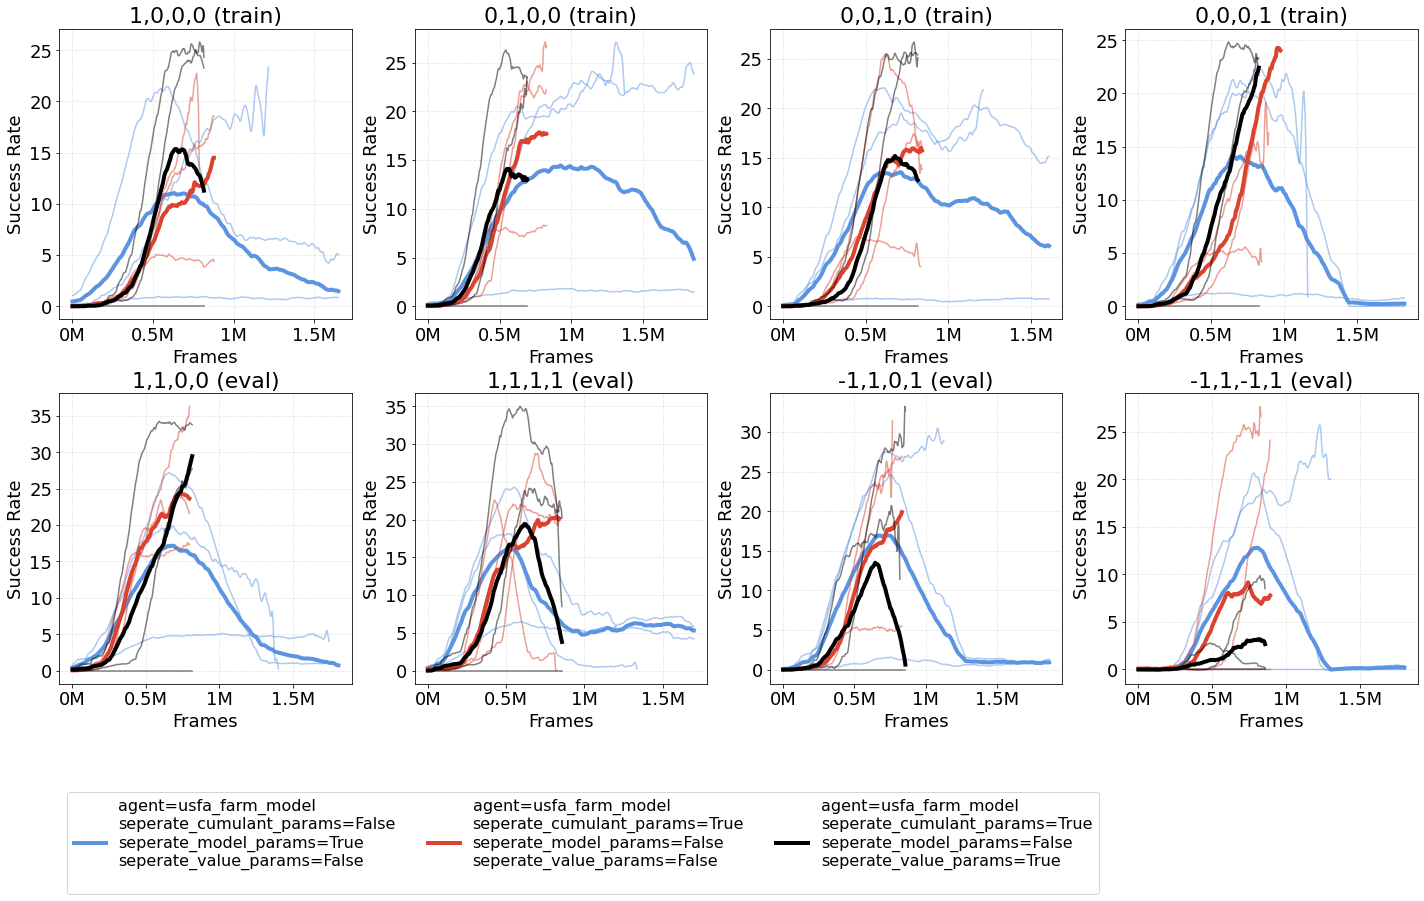

In [22]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    verbosity=0,
    maxcols=4,
    data_filters=[
        # dict(
        #     settings=dict(
        #         agent='usfa',
        #     ),
        # ),
        dict(
            settings=dict(
                agent='usfa_farm_model',
                seperate_value_params=None,
                seperate_model_params=None,
                seperate_cumulant_params=None,
            ),
        ),
    ],
    display_settings=['agent'],
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.75), 
                ncol=8,
                ),
    # fig_kwargs=dict(legend_text_size=20),
    plot_data_kwargs=dict(
        xlabel_key='evaluator/ActorSteps',
        xmax=2e6,
        n_samples=400,
        rolling=100,
        std_alpha=.1,
        runs_alpha=.5,
        err_fn=lambda h: h.grouped.sem(),
        err_style='runs'),
    subplot_kwargs=dict(unit=5),
)

# Takeaway
- Unsupervised USFA doesn't do that well
- just replacing LSTM w/ FARM dramatically improves performance